In [12]:
from matplotlib import pyplot as plt
from scipy.io import wavfile
import numpy as np

def stft(samples ,window_size ,window_shift,weights =0):
    if weights == 0:
        weights = np.ones(window_size)
    start = 0
    _samples = np.zeros(((samples.shape[0]-window_size)//window_shift+1,window_size),dtype='complex')
    while start + window_size < samples.shape[0]:
        _samples[int(start//window_shift),:] = np.fft.fft(samples[start:start+window_size]*weights)
        start+=window_shift
    return _samples,window_size,window_shift

def istft(samples ,window_size ,window_shift):
    _samples = np.zeros((samples.shape[0]-1)*window_shift+window_size,dtype='complex')
    start=0
    while start + window_size < _samples.shape[0]:
        _samples[start:start+window_size] += np.fft.ifft(samples[int(start//window_shift),:])
        start+=window_shift
    _samples[window_shift:-window_shift+1]/=2
    return _samples,window_size,window_shift

/Users/odedvaalany/anaconda3/envs/IntroToImagePro/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/odedvaalany/anaconda3/envs/IntroToImagePro/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


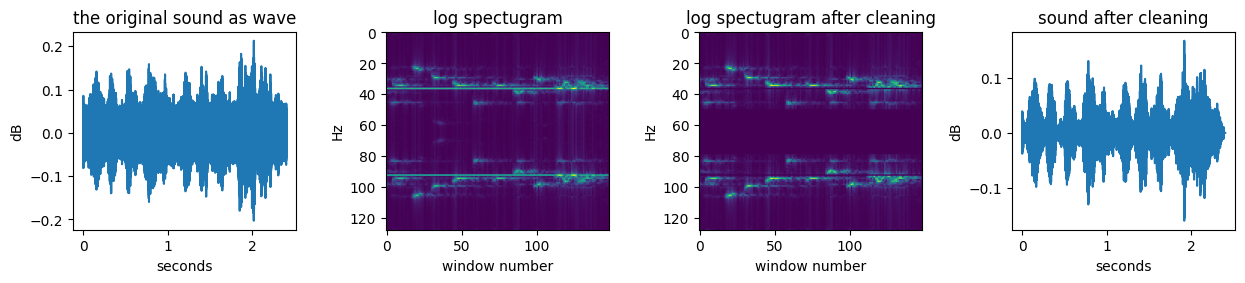

In [13]:



size = 128
q1file = wavfile.read(filename="./q1.wav")
f,axis = plt.subplots(1,4,figsize=(15,2))
plt.subplots_adjust(top = 0.99, bottom=0, hspace=1, wspace=0.4)
axis[0].plot(np.arange(len(q1file[1]))/4000,q1file[1])
axis[0].set_xlabel("seconds")
axis[0].set_ylabel("dB")
axis[0].set_title("the original sound as wave")
a,b,c = stft(np.asarray(q1file[1],dtype='complex'),size,64)
axis[1].imshow(np.log(np.abs(a[:,:size].T)+1),aspect='auto')
axis[1].set_title("log spectugram")
axis[1].set_xlabel("window number")
axis[1].set_ylabel("Hz")
a[:,36:37]=0
a[:,92:93]=0
a[:,50:79]=0
axis[2].imshow(np.log(np.abs(a[:,:size].T)+1),aspect='auto')
axis[2].set_title("log spectugram after cleaning")
axis[2].set_xlabel("window number")
axis[2].set_ylabel("Hz")
aa,bb,cc = istft(a,b,c)
axis[3].plot(np.arange(len(q1file[1]))/4000,aa)
axis[3].set_title("sound after cleaning")
axis[3].set_xlabel("seconds")
axis[3].set_ylabel("dB")
plt.show()
wavfile.write(data=np.real(aa).astype('float32'),rate=4000,filename="./q1_output_1.wav")

20000


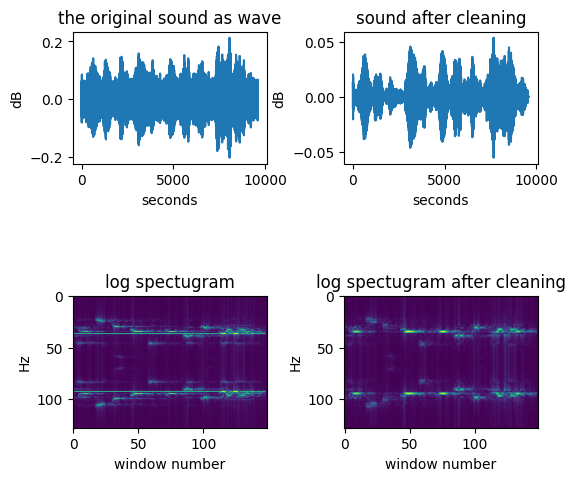

In [47]:
size = 128
print(len(q1file[1]))
q1file = wavfile.read(filename="./q1.wav")
f,axis = plt.subplots(2,2,figsize=(6,4))
plt.subplots_adjust(top = 0.99, bottom=0, hspace=1, wspace=0.4)
axis[0,0].plot(np.arange(len(q1file[1])),q1file[1])
axis[0,0].set_title("the original sound as wave")
axis[0,0].set_xlabel("seconds")
axis[0,0].set_ylabel("dB")
a,b,c = stft(np.asarray(q1file[1],dtype='complex'),size,64)
axis[1,0].imshow(np.log(np.abs(a[:,:size].T)+1),aspect='auto')
axis[1,0].set_title("log spectugram")
axis[1,0].set_xlabel("window number")
axis[1,0].set_ylabel("Hz")
a[:,36:37]=0
a[:,92:93]=0
kernel = np.array([1,2,1])/4
for i in range(a.shape[1]):
    a[:,i] = np.convolve(a[:,i],kernel,mode='same')
for i in range(a.shape[0]):
    a[i,:] = np.convolve(a[i,:],kernel,mode='same')
kernel = np.array([1])/1
for i in range(a.shape[1]):
    a[:,i] = np.convolve(a[:,i],kernel,mode='same')
for i in range(a.shape[0]):
    a[i,:] = np.convolve(a[i,:],kernel,mode='same')
axis[1,1].imshow(np.log(np.abs(a[:,:size].T)+1),aspect='auto')
axis[1,1].set_title("log spectugram after cleaning")
axis[1,1].set_xlabel("window number")
axis[1,1].set_ylabel("Hz")
aa,bb,cc = istft(a,b,c)
axis[0,1].plot(range(len(q1file[1])),aa)
axis[0,1].set_title("sound after cleaning")
axis[0,1].set_xlabel("seconds")
axis[0,1].set_ylabel("dB")
plt.show()
wavfile.write(data=np.real(aa).astype('float32'),rate=4000,filename="./q2_output.wav")

9600


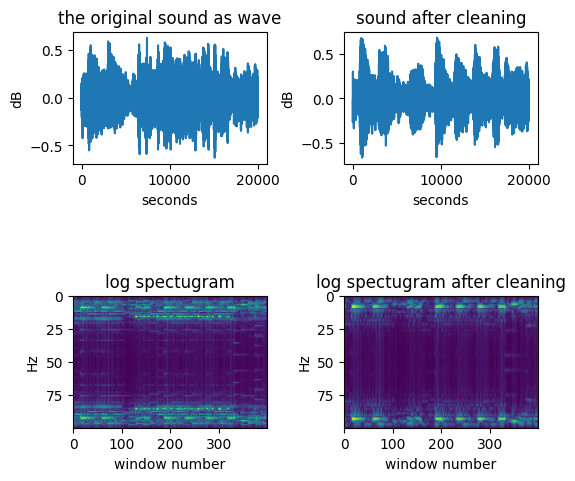

In [48]:
size = 100
print(len(q1file[1]))
q1file = wavfile.read(filename="./q2.wav")
f,axis = plt.subplots(2,2,figsize=(6,4))
plt.subplots_adjust(top = 0.99, bottom=0, hspace=1, wspace=0.4)
axis[0,0].plot(np.arange(len(q1file[1])),q1file[1])
axis[0,0].set_title("the original sound as wave")
axis[0,0].set_xlabel("seconds")
axis[0,0].set_ylabel("dB")
a,b,c = stft(np.asarray(q1file[1],dtype='complex'),size,50)
axis[1,0].imshow(np.log(np.abs(a[:,:size].T)+1),aspect='auto')
axis[1,0].set_title("log spectugram")
axis[1,0].set_xlabel("window number")
axis[1,0].set_ylabel("Hz")
copy = np.zeros(a.shape,dtype='complex')
copy[:,:] = a[:,:]
kernel = np.array([1,2,1])/4
for i in range(copy.shape[1]):
    copy[:,i] = np.convolve(copy[:,i],kernel,mode='same')
for i in range(copy.shape[0]):
    copy[i,:] = np.convolve(copy[i,:],kernel,mode='same')
kernel = np.array([1,4,1])/6
for i in range(copy.shape[1]):
    copy[:,i] = np.convolve(copy[:,i],kernel,mode='same')
for i in range(copy.shape[0]):
    copy[i,:] = np.convolve(copy[i,:],kernel,mode='same')
a=copy
axis[1,1].imshow(np.log(np.abs(a[:,:size].T)+1),aspect='auto')
axis[1,1].set_title("log spectugram after cleaning")
axis[1,1].set_xlabel("window number")
axis[1,1].set_ylabel("Hz")
aa,bb,cc = istft(a,b,c)
aa*=5
axis[0,1].plot(range(len(q1file[1])),aa)
axis[0,1].set_title("sound after cleaning")
axis[0,1].set_xlabel("seconds")
axis[0,1].set_ylabel("dB")
plt.show()
wavfile.write(data=np.real(aa).astype('float32'),rate=4000,filename="./q2_output_v2.wav")